<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_003_tensorflow_cuk_edu/_001_2_txt/_003_text_scraping_for_categorical_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Driver install 

In [1]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 911kB 6.4MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic I

In [2]:
from bs4 import BeautifulSoup, builder
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
import requests
import pandas as pd
import time
# from multiprocessing import Pool
import numpy as np
import os

In [3]:
!python --version

Python 3.6.9


## 기사 수집에 필요한 동작과 데이터 csv 파일 전환 객체 생성


In [4]:
# class TopicModelForArticle():
#     def __init__(self):
#       self.df_docs = pd.DataFrame(columns=['article', 'category'])
#       # self.workers = 5
#       # self.pool = Pool(processes=self.workers)

#     def accumulate_article(self):
#       self.wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
#       self.wd.get('https://koreajoongangdaily.joins.com/section/allArticles')
#       for x in np.arange(5500):
#         if x % 1000 == 0:
#           print(len(set(self.wd.find_elements_by_xpath('//*[@id="main-second-content"]/div[1]/div[*]/a'))))
#         self.wd.execute_script("getMoreSectionPage()")        
      
#       print(len(set(self.wd.find_elements_by_xpath('//*[@id="main-second-content"]/div[1]/div[*]/a'))))
#       print('complete acc')
#       return np.array(set(self.wd.find_elements_by_xpath('//*[@id="main-second-content"]/div[1]/div[*]/a')))

#     def append_article(self):
#       a_list = self.wd.find_elements_by_xpath('//*[@id="main-second-content"]/div[1]/div[*]/a')
#       for a in a_list:
#         article = requests.get(a.get_attribute('href'))
#         soup = BeautifulSoup(article.text, builder.HTML)
#         body = soup.select_one('#article_body')
#         body_text = body.get_text()
#         self.df_docs = self.df_docs.append({'article': body_text, 'category': a.get_attribute("href").split("/")[7]}, 
#                                           ignore_index=True)
        
#         print(self.df_docs.info())


#     def remove_title(self, body, title):
#       return body.replace(title, '')

#     def make_csv(self):
#       """ csv 파일로 변환하기 """
#       self.df_docs.to_csv("recent_month_popular_{}.csv".format(self.current_date))

In [5]:
# tma = TopicModelForArticle()

In [6]:
# tma.accumulate_article()

In [7]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get('https://koreajoongangdaily.joins.com/section/allArticles')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [8]:
%%time
for x in np.arange(8000):
  if x % 1000 == 0:
    print(len(set(wd.find_elements_by_xpath('//*[@id="main-second-content"]/div[1]/div[*]/a'))))
  wd.execute_script("getMoreSectionPage()")        

print(len(set(wd.find_elements_by_xpath('//*[@id="main-second-content"]/div[1]/div[*]/a'))))
print('complete acc')


10
250
740
1620
3170
5730
8780
10000
10000
complete acc
CPU times: user 8.7 s, sys: 514 ms, total: 9.21 s
Wall time: 11min 12s


In [9]:
arr_a = wd.find_elements_by_xpath('//*[@id="main-second-content"]/div[1]/div[*]/a')

In [ ]:
len(arr_a)

테스트

In [11]:
%%time
def clean_text(txt: str) -> str:
  return re.sub('[^a-zA-Z\'"\.\?]', ' ', txt)

def test_one(arr_one, bt, cate, t_cates):
  article = requests.get(arr_one.get_attribute('href'))
  soup = BeautifulSoup(article.text, builder.HTML)
  body = soup.select_one('#article_body')
  body_text = body.get_text()
  cate_list = arr_one.get_attribute("href").split("/")
  
  bt.append(body_text)
  cate.append(cate_list[7])
  t_cates.append((cate_list[6], cate_list[8]))
  
test_body = []
test_cate = []
test_cates = []

test_one(arr_a[9], test_body, test_cate, test_cates)

CPU times: user 32.6 ms, sys: 1.03 ms, total: 33.6 ms
Wall time: 1.06 s


In [12]:
test_one(arr_a[10], test_body, test_cate, test_cates)
len(test_body)

2

In [13]:
import multiprocessing

multiprocessing.cpu_count()

2

In [15]:
len(test_body), len(test_cate), len(test_cates)

(2, 2, 2)

In [16]:
pd.DataFrame({'article': test_body, 'category':test_cate, 'cates': test_cates})

,article,category,cates
0,\nBlue House names new foreign policy secretar...,politics,"(national, Kim-Yonghyon-presidential-secretary..."
1,\nSeventeen to perform 'Fallin' Flower' in Kor...,kpop,"(entertainment, The-Face-Music-Awards-Seventee..."


## 실제 데이터

In [17]:
def make_docs(arr, articles, urls):
  url_list = arr
  for a in url_list:
    article = requests.get(a.get_attribute('href'))
    soup = BeautifulSoup(article.text, builder.HTML)
    body = soup.select_one('#article_body')
    body_text = body.get_text()
    url = a.get_attribute("href")
    # df = df.append({'article': body_text, 'category': cate_list[7], 'category6': cate_list[6], 'category8': cate_list[8]}, 
                                      # ignore_index=True)
    articles.append(body_text)
    urls.append(url)

In [18]:
articles = []
urls = []

%time make_docs(arr_a, articles, urls)

CPU times: user 5min 7s, sys: 9.1 s, total: 5min 16s
Wall time: 2h 27min 12s


In [19]:
df_docs = pd.DataFrame({'article': articles, 'urls': urls})
df_docs

,article,urls
0,\nBetter to give property than to receive a bi...,https://koreajoongangdaily.joins.com/2020/11/2...
1,"\n[NEWS ANALYSIS] As foreigners rush back, mar...",https://koreajoongangdaily.joins.com/2020/11/2...
2,\nSK Telcom merges two security services subsi...,https://koreajoongangdaily.joins.com/2020/11/2...
3,\nBorder restrictions drastically cut North Ko...,https://koreajoongangdaily.joins.com/2020/11/2...
4,"\nBureaucracy weighs in on AI, gives it a to-d...",https://koreajoongangdaily.joins.com/2020/11/2...
...,...,...
9995,\nExplosion at institute for defense kills one...,https://koreajoongangdaily.joins.com/2019/11/1...
9996,\nReady to relax\n\n\n\n\n\n\n\nStudents who f...,https://koreajoongangdaily.joins.com/2019/11/1...
9997,\nRyu Hyun-jin very nearly wins Cy Young Award...,https://koreajoongangdaily.joins.com/2019/11/1...
9998,\nPark Byung-ho just isn’t hitting like Park B...,https://koreajoongangdaily.joins.com/2019/11/1...


In [22]:
df_docs['category'] = df_docs['urls'].apply(lambda x: x.split('/')[7])

In [29]:
len('https://koreajoongangdaily.joins.com/2019/11/14/socialAffairs/Explosion-at-institute-for-defense-kills-one-injures-6/3070273.html'.split('/'))

9

In [32]:
len('https://koreajoongangdaily.joins.com/2020/11/28/business/economy/real-estate-comprehensive-real-estate-tax-capital-gains-tax/20201128070110734.html'.split("/"))

10

In [64]:
'https://koreajoongangdaily.joins.com/2020/11/28/business/economy/real-estate-comprehensive-real-estate-tax-capital-gains-tax/20201128070110734.html'.split('/')[7]

'economy'

In [47]:
len('https://koreajoongangdaily.joins.com//2020/05/18/industry/caption-uniform-uniforms-at//20200518200509322.html'.split('/'))

11

In [49]:
'https://koreajoongangdaily.joins.com//2020/05/18/industry/caption-uniform-uniforms-at//20200518200509322.html'.split('/')[6]

'18'

In [66]:
'https://koreajoongangdaily.joins.com/2020/11/12/sports/more/Teddy-LoL-T1/20201112170206914.html'.split('/')[6]

'sports'

In [67]:
len('https://koreajoongangdaily.joins.com/2020/11/12/sports/more/Teddy-LoL-T1/20201112170206914.html'.split('/'))

10

In [68]:
'https://koreajoongangdaily.joins.com/2020/11/12/sports/more/Teddy-LoL-T1/20201112170206914.html'.split('/')[6]

'sports'

카테고리 정제
```python
url_split = url.split('/')
```
- url 깊이가 9인 것  -> 6
- url 깊이가 10인 것 -> 7

In [69]:
 def extract_category(url):
  url_split = url.split("/")
  if len(url_split) > 10:
    return url_split[7]

  return url_split[6]

In [70]:
df_docs['category'] = df_docs['urls'].apply(extract_category)

In [75]:
df_docs.iloc[5142, :].values

array(["\nOlympic athletes' return to training center postponed \n                  The scheduled return of Korean Olympic athletes to the national training center has been pushed back by a week in light of a recent spike in new coronavirus cases.     \xa0     The Korean Sport & Olympic Committee (KSOC) said Monday that the first batch of athletes and coaches who had been set to re-enter the Jincheon National Training Center this week will do so next week.     \xa0     They had cleared out of the training center in March, after the 2020 Tokyo Olympics got postponed by one year due to the coronavirus pandemic.\xa0     \xa0     The KSOC sent some 500 athletes and coaches home to recharge — they had been holed up inside the national center for months on end — and then sanitized Jincheon gyms and residence buildings.     \xa0     Buoyed by a steady decline in Covid-19 cases last month, the KSOC said on April 27 that the athletes will return this week. The plan was thrown off track over the

In [72]:
for group, doc in df_docs.groupby('category'):
  print(group)
  print(doc)
  print('-' * 100)

Baseball
                                                article  ...  category
4629  \nPowerful pitching keeps Dinos at the top of ...  ...  Baseball
4633  \nHigh school teammates find success as rival ...  ...  Baseball
4662  \nKang Jung-ho wants to come back to Heroes\n ...  ...  Baseball
4663  \nKiwoom parts ways with Taylor Motter after a...  ...  Baseball
4948  \nDinos shine over weekend, continue dominatin...  ...  Baseball
...                                                 ...  ...       ...
9964  \nRyu says it would be nice to play with Choo\...  ...  Baseball
9965  \nTop MLB prospect watches and learns at WBSC ...  ...  Baseball
9997  \nRyu Hyun-jin very nearly wins Cy Young Award...  ...  Baseball
9998  \nPark Byung-ho just isn’t hitting like Park B...  ...  Baseball
9999  \nMexico's success is all about the scouting\n...  ...  Baseball

[362 rows x 3 columns]
----------------------------------------------------------------------------------------------------
artsDesign
   

## 기사 url을 가져와 pandas DataFrame 만들기

## 특수문자 제거를 위한 정규표현 모듈 선언

In [76]:
import re

정규식 테스트

In [77]:
testx = "['mybody'] is not good \"Sum\" one"
v = re.sub('[^a-zA-Z\'"]', "", testx)
v

'\'mybody\'isnotgood"Sum"one'

## 문장의 word count 생성

In [78]:
df_docs['word_count'] = df_docs['article'].apply(lambda x: len(x.split()))

In [79]:
df_docs.head()

,article,urls,category,word_count
0,\nBetter to give property than to receive a bi...,https://koreajoongangdaily.joins.com/2020/11/2...,business,415
1,"\n[NEWS ANALYSIS] As foreigners rush back, mar...",https://koreajoongangdaily.joins.com/2020/11/2...,business,930
2,\nSK Telcom merges two security services subsi...,https://koreajoongangdaily.joins.com/2020/11/2...,business,211
3,\nBorder restrictions drastically cut North Ko...,https://koreajoongangdaily.joins.com/2020/11/2...,business,420
4,"\nBureaucracy weighs in on AI, gives it a to-d...",https://koreajoongangdaily.joins.com/2020/11/2...,business,348


In [82]:
print(f"단어 최대 값: {df_docs['word_count'].max()}")
print(f"단어 평균 값: {df_docs['word_count'].mean()}")
print(f"단어 표준편차: {df_docs['word_count'].std()}")
print(f"단어 중간 값: {df_docs['word_count'].median()}")
print(f"단어 최소 값: {df_docs['word_count'].min()}")

단어 최대 값: 5238
단어 평균 값: 497.1842
단어 표준편차: 404.5256654054935
단어 중간 값: 419.0
단어 최소 값: 3


## 기사의 전체 길이 확인

In [84]:
df_docs['article_length'] = df_docs['article'].apply(lambda x: len(x))


In [85]:
print(f"문장 최대 길이: {df_docs['article_length'].max()}")
print(f"문장 평균 길이: {df_docs['article_length'].mean()}")
print(f"문장 중간 길이: {df_docs['article_length'].median()}")
print(f"문장 표준편차: {df_docs['article_length'].std()}")
print(f"문장 제3사분위: {np.percentile(df_docs['article_length'], 75)}")

문장 최대 길이: 30218
문장 평균 길이: 3123.2875
문장 중간 길이: 2711.0
문장 표준편차: 2424.492394209741
문장 제3사분위: 4220.0


(array([ 46., 561., 386., 142., 168., 276., 326., 333., 331., 311., 297.,
        285., 248., 278., 252., 266., 285., 268., 304., 293., 245., 267.,
        255., 245., 241., 234., 190., 230., 183., 162., 172., 134., 125.,
        117., 134., 115.,  82.,  93.,  79.,  65.,  65.,  57.,  60.,  67.,
         48.,  46.,  49.,  40.,  29.,  32.,  34.,  27.,  19.,  23.,  23.,
         12.,  16.,  23.,  17.,  13.,  10.,  10.,  12.,  13.,  12.,   9.,
         14.,   5.,   6.,  10.,   6.,  10.,   9.,  12.,   9.,  11.,   4.,
          6.,   5.,  11.,   6.,   7.,   4.,   5.,   7.,   3.,   6.,   7.,
          2.,   4.,   1.,   5.,   2.,   0.,   4.,   1.,   1.,   0.,   0.,
          2.,   0.,   3.,   3.,   2.,   2.,   0.,   0.,   0.,   1.,   2.,
          0.,   0.,   1.,   1.,   0.,   1.,   1.,   2.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

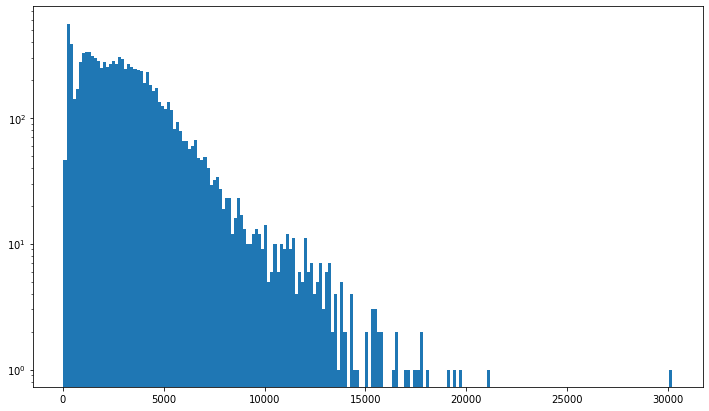

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.yscale('log', nonposy='clip')
plt.hist(df_docs['article_length'], bins=200)

{'boxes': [<matplotlib.lines.Line2D at 0x7fab30064b00>],
 'caps': [<matplotlib.lines.Line2D at 0x7fab2fbd1550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fab2fbd7358>],
 'means': [<matplotlib.lines.Line2D at 0x7fab2fbd1fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fab2fbd1c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fab30064e10>,
  <matplotlib.lines.Line2D at 0x7fab2fbd11d0>]}

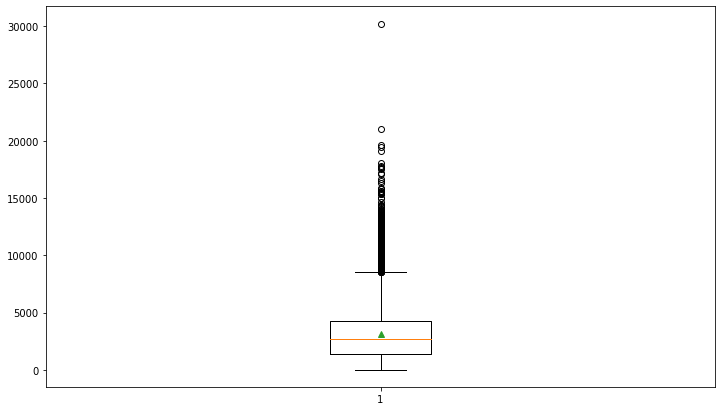

In [89]:
plt.figure(figsize=(12, 7))
plt.boxplot(df_docs['article_length'], showmeans=True)

기사 길이
- 평균은 3천개 선
- 3만이 넘는 이상치 하나

{'boxes': [<matplotlib.lines.Line2D at 0x7fab2fb96748>],
 'caps': [<matplotlib.lines.Line2D at 0x7fab2fb9f198>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fab2fb9ff60>],
 'means': [<matplotlib.lines.Line2D at 0x7fab2fb9fc18>],
 'medians': [<matplotlib.lines.Line2D at 0x7fab2fb9f898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fab2fb96a58>,
  <matplotlib.lines.Line2D at 0x7fab2fb96dd8>]}

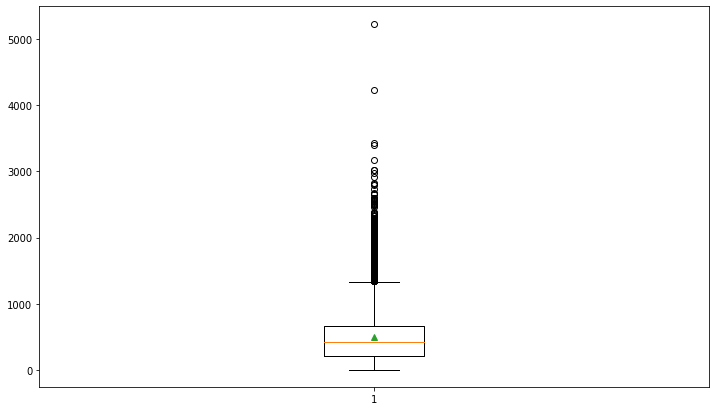

In [90]:
plt.figure(figsize=(12, 7))
# plt.yscale('log', nonposy='clip')
plt.boxplot(df_docs['word_count'], showmeans=True)

단어 개수
- 평균이 600 선
- 제3사분위가 1200개
- 4000 넘는 이상치 두 개

## 특수문자 제거

In [73]:
def clean_text(txt: str) -> str:
  return " ".join(re.sub('[^a-zA-Z]', ' ', txt).split())

In [ ]:
df_docs['clean_article'] = df_docs['article'].apply(clean_text)

# 데이터 수집 및 전처리 작업 결과 저장

In [117]:
df_docs.to_csv('/content/drive/MyDrive/Colab Notebooks/data/data/text_LDA.csv', sep='\t', index=False)

In [118]:
df_docs

,article,urls,category,word_count,article_length,clean_article
0,\nBetter to give property than to receive a bi...,https://koreajoongangdaily.joins.com/2020/11/2...,business,415,2596,Better to give property than to receive a big ...
1,"\n[NEWS ANALYSIS] As foreigners rush back, mar...",https://koreajoongangdaily.joins.com/2020/11/2...,business,930,5798,NEWS ANALYSIS As foreigners rush back market d...
2,\nSK Telcom merges two security services subsi...,https://koreajoongangdaily.joins.com/2020/11/2...,business,211,1392,SK Telcom merges two security services subsidi...
3,\nBorder restrictions drastically cut North Ko...,https://koreajoongangdaily.joins.com/2020/11/2...,business,420,2757,Border restrictions drastically cut North Kore...
4,"\nBureaucracy weighs in on AI, gives it a to-d...",https://koreajoongangdaily.joins.com/2020/11/2...,business,348,2488,Bureaucracy weighs in on AI gives it a to do l...
...,...,...,...,...,...,...
9995,\nExplosion at institute for defense kills one...,https://koreajoongangdaily.joins.com/2019/11/1...,socialAffairs,421,2692,Explosion at institute for defense kills one i...
9996,\nReady to relax\n\n\n\n\n\n\n\nStudents who f...,https://koreajoongangdaily.joins.com/2019/11/1...,socialAffairs,39,250,Ready to relax Students who finished the Colle...
9997,\nRyu Hyun-jin very nearly wins Cy Young Award...,https://koreajoongangdaily.joins.com/2019/11/1...,Baseball,676,3802,Ryu Hyun jin very nearly wins Cy Young Award R...
9998,\nPark Byung-ho just isn’t hitting like Park B...,https://koreajoongangdaily.joins.com/2019/11/1...,Baseball,828,4659,Park Byung ho just isn t hitting like Park Byu...


# 불용어 제거 / stemming / lemmatization


## 불용어 제거를 위한 nltk install

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data/text_LDA.csv', sep='\t', )

In [5]:
df.head()

,article,urls,category,word_count,article_length,clean_article
0,\nBetter to give property than to receive a bi...,https://koreajoongangdaily.joins.com/2020/11/2...,business,415,2596,Better to give property than to receive a big ...
1,"\n[NEWS ANALYSIS] As foreigners rush back, mar...",https://koreajoongangdaily.joins.com/2020/11/2...,business,930,5798,NEWS ANALYSIS As foreigners rush back market d...
2,\nSK Telcom merges two security services subsi...,https://koreajoongangdaily.joins.com/2020/11/2...,business,211,1392,SK Telcom merges two security services subsidi...
3,\nBorder restrictions drastically cut North Ko...,https://koreajoongangdaily.joins.com/2020/11/2...,business,420,2757,Border restrictions drastically cut North Kore...
4,"\nBureaucracy weighs in on AI, gives it a to-d...",https://koreajoongangdaily.joins.com/2020/11/2...,business,348,2488,Bureaucracy weighs in on AI gives it a to do l...


In [6]:
!pip install nltk

In [7]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from gensim.models import word2vec

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## stemming 작업

In [19]:
p = PorterStemmer()
sw = set(stopwords.words('english'))

def stemming(txt):
  return ' '.join([p.stem(w) for w in word_tokenize(txt) if not w.lower() in sw])

def stemming_for_w2v(txt):
  return [p.stem(w) for w in word_tokenize(txt)]

In [7]:
stemming('[nltk_data] Downloading package stopwords to /root/nltk_data...')

'[ nltk_data ] download packag stopword /root/nltk_data ...'

In [8]:
df_temp = df.iloc[:, [5, 2]]

In [9]:
def label_encoding(label):
  return t.word_index[label.lower()]
# df_categories2 = pd.get_dummies(df_temp['category'])

In [10]:
df_article = df_temp['clean_article'].apply(stemming_for_w2v)

import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',
                    level=logging.INFO)

num_features = 600
min_word_count = 40
num_workers = 4
context = 10
down_sampling = 1e-3

model = word2vec.Word2Vec(sentences=df_article,
                          workers=num_workers,
                          size=num_features,
                          min_count=min_word_count,
                          window=context,
                          sample=down_sampling)


2020-11-29 05:19:36,089 : INFO : collecting all words and their counts
2020-11-29 05:19:36,090 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-11-29 05:19:37,107 : INFO : collected 34211 word types from a corpus of 5172366 raw words and 10000 sentences
2020-11-29 05:19:37,108 : INFO : Loading a fresh vocabulary
2020-11-29 05:19:37,206 : INFO : effective_min_count=40 retains 5496 unique words (16% of original 34211, drops 28715)
2020-11-29 05:19:37,207 : INFO : effective_min_count=40 leaves 5012461 word corpus (96% of original 5172366, drops 159905)
2020-11-29 05:19:37,228 : INFO : deleting the raw counts dictionary of 34211 items
2020-11-29 05:19:37,231 : INFO : sample=0.001 downsamples 37 most-common words
2020-11-29 05:19:37,234 : INFO : downsampling leaves estimated 3810840 word corpus (76.0% of prior 5012461)
2020-11-29 05:19:37,254 : INFO : estimated required memory for 5496 words and 600 dimensions: 29128800 bytes
2020-11-29 05:19:37,255 : INFO : r

In [11]:
index2word_set = set(model.wv.index2word)
len(index2word_set)

5496

In [12]:
model_name = '/content/drive/MyDrive/Colab Notebooks/data/data/' +'600features_40minwords_10context'
model.save(model_name)

2020-11-29 05:21:07,145 : INFO : saving Word2Vec object under /content/drive/MyDrive/Colab Notebooks/data/data/600features_40minwords_10context, separately None
2020-11-29 05:21:07,148 : INFO : not storing attribute vectors_norm
2020-11-29 05:21:07,151 : INFO : not storing attribute cum_table
2020-11-29 05:21:09,343 : INFO : saved /content/drive/MyDrive/Colab Notebooks/data/data/600features_40minwords_10context


In [13]:
df_article

0       [better, to, give, properti, than, to, receiv,...
1       [new, analysi, As, foreign, rush, back, market...
2       [SK, telcom, merg, two, secur, servic, subsidi...
3       [border, restrict, drastic, cut, north, korea,...
4       [bureaucraci, weigh, in, on, AI, give, it, a, ...
                              ...                        
9995    [explos, at, institut, for, defens, kill, one,...
9996    [readi, to, relax, student, who, finish, the, ...
9997    [ryu, hyun, jin, veri, nearli, win, Cy, young,...
9998    [park, byung, ho, just, isn, t, hit, like, par...
9999    [mexico, 's, success, is, all, about, the, sco...
Name: clean_article, Length: 10000, dtype: object

In [70]:
import re
def clean_text(txt: str) -> str:
  return " ".join(re.sub('[^a-zA-Z]', ' ', txt).split())

In [26]:
df_temp['clean_article'] = df_temp['clean_article'].apply(clean_text)
%time df_article = df_temp['clean_article'].apply(stemming)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CPU times: user 1min 13s, sys: 131 ms, total: 1min 14s
Wall time: 1min 14s


In [71]:
t = Tokenizer()
t.fit_on_texts(df_temp['category'].unique())
t.fit_on_texts(df_article)

In [72]:
t.word_counts

OrderedDict([('business', 1),
             ('national', 1),
             ('entertainment', 1),
             ('sports', 1),
             ('culture', 1),
             ('imagenews', 1),
             ('englishstudy', 1),
             ('kpop', 7),
             ('economy', 1),
             ('industry', 1),
             ('finance', 1),
             ('tech', 503),
             ('socialaffairs', 1),
             ('defense', 1),
             ('politics', 1),
             ('people', 1),
             ('baseball', 1),
             ('diplomacy', 1),
             ('movies', 1),
             ('koreanheritage', 1),
             ('golf', 389),
             ('books', 1),
             ('musicperformance', 1),
             ('photos', 1),
             ('football', 1),
             ('foodtravel', 1),
             ('sponsoredreports', 1),
             ('northkorea', 1),
             ('sportinterview', 1),
             ('etc', 14),
             ('artsdesign', 1),
             ('features', 1),
             ('vi

In [73]:
t.word_index

{'said': 1,
 'korea': 2,
 'year': 3,
 'percent': 4,
 'korean': 5,
 'seoul': 6,
 'also': 7,
 'new': 8,
 'kim': 9,
 'compani': 10,
 'first': 11,
 'lee': 12,
 'govern': 13,
 'peopl': 14,
 'last': 15,
 'one': 16,
 'time': 17,
 'two': 18,
 'joongang': 19,
 'co': 20,
 'group': 21,
 'start': 22,
 'day': 23,
 'countri': 24,
 'north': 25,
 'kr': 26,
 'month': 27,
 'work': 28,
 'includ': 29,
 'nation': 30,
 'million': 31,
 'accord': 32,
 'like': 33,
 'park': 34,
 'coronaviru': 35,
 'use': 36,
 'sinc': 37,
 'market': 38,
 'billion': 39,
 'make': 40,
 'unit': 41,
 'state': 42,
 'offici': 43,
 'servic': 44,
 'three': 45,
 'take': 46,
 'busi': 47,
 'would': 48,
 'report': 49,
 'u': 50,
 'parti': 51,
 'plan': 52,
 'moon': 53,
 'may': 54,
 'case': 55,
 'monday': 56,
 'product': 57,
 'film': 58,
 'week': 59,
 'south': 60,
 'made': 61,
 'world': 62,
 'releas': 63,
 'industri': 64,
 'show': 65,
 'yonhap': 66,
 'tuesday': 67,
 'wednesday': 68,
 'ministri': 69,
 'say': 70,
 'member': 71,
 'local': 72,
 'an

In [74]:
df_article = df_article.apply(lambda x: x.lower())
df_article

0       better give properti receiv big tax bill view ...
1       new analysi foreign rush back market face fina...
2       sk telcom merg two secur servic subsidiari sk ...
3       border restrict drastic cut north korea trade ...
4       bureaucraci weigh ai give list presid moon jae...
                              ...                        
9995    explos institut defens kill one injur year old...
9996    readi relax student finish colleg scholast abi...
9997    ryu hyun jin nearli win cy young award ryu hyu...
9998    park byung ho hit like park byung ho park byun...
9999    mexico success scout onset world basebal softb...
Name: clean_article, Length: 10000, dtype: object

In [75]:
art_sequences = t.texts_to_sequences(df_article.values)

In [76]:
%time df_article_t = df_article.apply(lambda x: t.texts_to_sequences(x))

CPU times: user 1min 39s, sys: 2.52 s, total: 1min 42s
Wall time: 1min 42s


In [88]:
article_t = pad_sequences(art_sequences, maxlen=600)
article_t

array([[  0,   0,   0, ...,  19,  20,  26],
       [  0,   0,   0, ...,  19,  20,  26],
       [  0,   0,   0, ...,  19,  20,  26],
       ...,
       [  0,   0,   0, ...,  19,  20,  26],
       [  0,   0,   0, ...,  19,  20,  26],
       [  0,   0,   0, ..., 727, 102,  66]], dtype=int32)

# 문장 벡터, label 저장

In [94]:
np.save(open('/content/drive/MyDrive/Colab Notebooks/data/data/' + 'train_data.npy', 'wb'), article_t)

In [89]:
df_categories = df_temp['category'].apply(label_encoding)
df_categories

0       22187
1       22187
2       22187
3       22187
4       22187
        ...  
9995    22197
9996    22197
9997    22201
9998    22201
9999    22201
Name: category, Length: 10000, dtype: int64

In [96]:
np.save(open('/content/drive/MyDrive/Colab Notebooks/data/data/' + 'label_data.npy', 'wb'), np.array(df_categories))

In [112]:
df_merge  = pd.DataFrame({'article': df_article, 'category': df_temp['category']})
df_merge.to_csv('/content/drive/MyDrive/Colab Notebooks/data/data/cuk_txt_data.csv', sep='\t', index=False)

## 예측 실행을 위한 데이터 불러오기

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data/cuk_txt_data.csv', sep='\t')

In [2]:
df.head(2)

,article,category
0,better give properti receiv big tax bill view ...,business
1,new analysi foreign rush back market face fina...,business


In [4]:
df['article'].values

array(['better give properti receiv big tax bill view apart songpa distirct southern seoul seoul ski top lott world tower yonhap new real estat measur pass rais cost ownership penal sale properti owner choos pay rather pay later even gift tax make sens transfer real estat other hold onto properti get nickel dime etern accord korea apprais board roughli home given away year octob highest yearli figur sinc relat statist first compil apart record high situat evid affluent gangnam area southern seoul octob year total apart three gangnam area district south han river gangnam district seocho district songpa district hand gift account percent number total giveaway seoul recent boom give away properti larg due govern continu attempt increas tax rate relat real estat moon administr juli announc rais maximum rate capit gain tax tax profit made sell apart percent current percent new tax appli start june next year comprehens real estat tax anoth drive forc govern plan rais maximum rate comprehens 

# 문장 벡터화

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

tfidf_vectorizer = TfidfVectorizer(min_df=.0, 
                                   analyzer='char', 
                                   sublinear_tf=True,
                                   ngram_range=(1, 3),
                                   max_features=5000)

articles = list(df['article'].values)
categories = list(df['category'].apply(lambda x: x.lower()).unique())

tfidf_vectorizer.fit(articles + categories)
tok = Tokenizer()
tok.fit_on_texts(categories + articles)

In [6]:
# len(tfidf_vectorizer.vocabulary_) + 1

In [7]:
np.array(tok.texts_to_sequences(categories)).reshape((-1, ))

array([32366, 32367, 32368, 32369, 32370, 32371, 32372, 11712, 32373,
       32374, 32375,  1245, 32376, 32377, 32378, 32379, 32380, 32381,
       32382, 32383,  1511, 32384, 32385, 32386, 32387, 32388, 32389,
       32390, 32391,  8697, 32392, 32393, 32394, 32395, 17668, 32396])

In [43]:
y = df['category'].apply(lambda x: tok.word_index[x.lower()])
y

0       22187
1       22187
2       22187
3       22187
4       22187
        ...  
9995    22197
9996    22197
9997    22201
9998    22201
9999    22201
Name: category, Length: 10000, dtype: int64

In [44]:
X = tfidf_vectorizer.transform(articles).toarray()
X

array([[0.06185632, 0.04023378, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04816381, 0.02932728, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07688206, 0.04299833, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05298002, 0.03359647, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05127745, 0.0263666 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05919221, 0.03326158, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [75]:
tX = pad_sequences(tok.texts_to_sequences(articles), maxlen=3000)

## 머신러닝 train, test 데이터

In [76]:
from sklearn.model_selection import train_test_split
import numpy as np

RANDOM_SEED = 33
TEST_SPLIT = .3

# y = np.array(df['category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)
tX_train, tX_test, ty_train, ty_test = train_test_split(tX, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

In [77]:
X_train.shape, y_train.shape, tX_train.shape, ty_train.shape

((7000, 5000), (7000,), (7000, 3000), (7000,))

In [50]:
y_train

4702    22197
2304    22192
6243     8501
1777    22192
804     22191
        ...  
57      22187
578     22191
5848    22195
2439    22187
7188    22204
Name: category, Length: 7000, dtype: int64

In [ ]:
for a in X_train[0]:
  print(type(a))
  print("-"* 100)

In [10]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Input, BatchNormalization, Flatten, Activation, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7000, 5000), (7000,), (3000, 5000), (3000,))

## SGD 분류 예측

In [78]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.6756666666666666


In [79]:
model = SGDClassifier()
model.fit(tX_train, ty_train)
print(model.score(tX_test, ty_test))

0.154


## RandomForest 예측

In [58]:
# 너무 오래 걸림

from sklearn import ensemble
%time random_forest = ensemble.RandomForestRegressor(n_estimators=10)
random_forest.fit(X_train, y_train)

# 결정계수 표시
r2 = model.score(X_test, y_test)
print('결정계수 ', r2)

결정계수  0.68


## 딥러닝 train, test 데이터

In [80]:
X = tfidf_vectorizer.transform(articles).toarray()
y = pd.get_dummies(df['category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)
tX_train, tX_test, ty_train, ty_test = train_test_split(tX, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

In [81]:
X_train.shape, y_train.shape

((7000, 5000), (7000, 36))

# 첫 번째 딥러닝 모델

In [82]:
emb_size = 128

model = Sequential()

model.add(Embedding(5000, emb_size))
model.add(Dropout(.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))

model.add(LSTM(100, activation='tanh', return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(100, activation='tanh'))

model.add(Dense(36))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 128)         640000    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 64)          41024     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, None, 100)         66000     
_________________________________________________________________
batch_normalization_8 (Batch (None, None, 100)         400       
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)              

In [83]:
model.input_shape, model.output_shape

((None, None), (None, 36))

## optimizer adam 사용

In [84]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=128, 
                    epochs=33)

Epoch 1/33
55/55 [==============================] - 20s 371ms/step - loss: 3.8139 - accuracy: 0.0530
Epoch 2/33
55/55 [==============================] - 20s 368ms/step - loss: 3.5051 - accuracy: 0.0979
Epoch 3/33
55/55 [==============================] - 20s 366ms/step - loss: 3.4460 - accuracy: 0.1106
Epoch 4/33
55/55 [==============================] - 20s 367ms/step - loss: 3.3909 - accuracy: 0.1303
Epoch 5/33
55/55 [==============================] - 20s 369ms/step - loss: 3.3414 - accuracy: 0.1241
Epoch 6/33
55/55 [==============================] - 20s 367ms/step - loss: 3.2912 - accuracy: 0.1354
Epoch 7/33
55/55 [==============================] - 20s 366ms/step - loss: 3.2525 - accuracy: 0.1279
Epoch 8/33
55/55 [==============================] - 20s 367ms/step - loss: 3.2059 - accuracy: 0.1366
Epoch 9/33
55/55 [==============================] - 20s 366ms/step - loss: 3.1650 - accuracy: 0.1499
Epoch 10/33
55/55 [==============================] - 20s 367ms/step - loss: 3.1280 - accura

## optimizer rmsprop 사용

In [85]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=128, 
                    epochs=33)

Epoch 1/33
55/55 [==============================] - 20s 363ms/step - loss: 2.7034 - accuracy: 0.1921
Epoch 2/33
55/55 [==============================] - 20s 364ms/step - loss: 2.6934 - accuracy: 0.1946
Epoch 3/33
55/55 [==============================] - 20s 363ms/step - loss: 2.6839 - accuracy: 0.1956
Epoch 4/33
55/55 [==============================] - 20s 362ms/step - loss: 2.6762 - accuracy: 0.1951
Epoch 5/33
55/55 [==============================] - 20s 362ms/step - loss: 2.6695 - accuracy: 0.1929
Epoch 6/33
55/55 [==============================] - 20s 363ms/step - loss: 2.6630 - accuracy: 0.1953
Epoch 7/33
55/55 [==============================] - 20s 363ms/step - loss: 2.6574 - accuracy: 0.1953
Epoch 8/33
55/55 [==============================] - 20s 362ms/step - loss: 2.6534 - accuracy: 0.1957
Epoch 9/33
55/55 [==============================] - 20s 362ms/step - loss: 2.6491 - accuracy: 0.1963
Epoch 10/33
55/55 [==============================] - 20s 363ms/step - loss: 2.6443 - accura